In [2]:
# import movie metadata into pandas Dataframes
import pandas as pd
import re
kaggle_metadata = pd.read_csv('Data/movies_metadata.csv', low_memory=False)
ratings = pd.read_csv('Data/ratings.csv')

In [3]:
# Examine our extracted data --------------------------------
# Instead of using head() and tail() methods, we can use the sample(n=<# of values to pull>) method to randomly pull a number of values from the dataframe
# Pull 10 values from the kaggle_metadata dataframe
kaggle_metadata.sample(n=10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
8843,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",NaN,13189,tt0087056,en,A Christmas Carol,An old bitter miser who makes excuses for his ...,...,1984-12-17,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A new powerful presentation of the most loved ...,A Christmas Carol,False,7.1,42.0
10528,False,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",NaN,39261,tt0065854,en,The House That Dripped Blood,A Scotland Yard investigator looks into four m...,...,1971-06-16,0.0,102.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Vampires! Voodoo! Vixens! Victims!,The House That Dripped Blood,False,6.3,27.0
11060,False,NaN,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,31998,tt0038256,en,Without Love,"In World War II Washington DC, scientist Pat J...",...,1945-01-01,0.0,111.0,"[{'iso_639_1': 'fr', 'name': 'Français'}]",Released,She was a bashful bride! He walked in his sleep!,Without Love,False,6.0,5.0
27259,False,"{'id': 175763, 'name': 'TekWar Collection', 'p...",0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,113219,tt0111385,en,TekWar,"After four years, Jake Cardigan is prematurely...",...,1994-01-23,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Virtual Reality Can Be Murder,TekWar,False,5.4,8.0
29334,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 10769, '...",NaN,26569,tt0182666,zh,Hu bao long she ying,An aged Kung Fu practitioner travels across Ch...,...,1977-03-20,0.0,84.0,"[{'iso_639_1': 'zh', 'name': '普通话'}]",Released,NaN,The 7 Grandmasters,False,6.7,9.0
29161,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,192452,tt0097528,en,Hot Times at Montclair High,It's a new year at Montclair High and it's abo...,...,1989-01-01,0.0,87.0,[],Released,At Montclair High the students learn a lot mor...,Hot Times at Montclair High,False,6.0,1.0
27415,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,130241,tt0038810,en,Osone-ke no ashita,A Japanese family weathers much hardship after...,...,1946-02-21,0.0,81.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Morning for the Osone Family,False,8.0,3.0
20213,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.thetroublewithbliss.com/,90122,tt1483756,en,The Trouble with Bliss,35-year-old Morris Bliss (Michael C. Hall) is ...,...,2011-10-01,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,The Trouble with Bliss,False,4.0,19.0
41321,False,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 35, 'n...",http://www.efis.ee/en/film-categotries/movies/...,300438,tt0126438,et,Minu Leninid,Young and active nationalist Aleksander Keskül...,...,1997-10-02,0.0,99.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,All My Lenins,False,6.0,1.0
8126,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,104659,tt0081528,en,A Small Circle of Friends,"In the late 1960s, three Harvard students Jess...",...,1980-03-12,0.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The story of three people and the era that sha...,A Small Circle of Friends,False,6.0,1.0


In [4]:
# Convert output of read_csv to DataFrame
kaggle_metadata = pd.DataFrame(kaggle_metadata)

In [5]:
# Cast the dataframe's columns to a list to inspect
kaggle_metadata.columns.tolist()

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [6]:
# Planning our ETL pipeline
# 1. Inspect
# 2. Plan
# 3. Execute

# We want to slim down the number of columns in the above dataframe to a more manageable and RELEVANT number

In [7]:
kaggle_metadata.dtypes

adult                     object
belongs_to_collection     object
budget                    object
genres                    object
homepage                  object
id                        object
imdb_id                   object
original_language         object
original_title            object
overview                  object
popularity                object
poster_path               object
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
video                     object
vote_average             float64
vote_count               float64
dtype: object

In [8]:
# Convert discrepant data types:
# video: Boolean
# budget: numeric
# id: numeric
# release_date: datetime
# popularity: numeric
# adult: Boolean


In [9]:
# Tackle Adult column:

# Check data
kaggle_metadata['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
Name: adult, dtype: int64

In [10]:
# Clean data
# The following uses Pandas boolean operator ~ (aka all values that are False for .isin(['True','False']), or values that aren't True or False)
kaggle_metadata[~kaggle_metadata['adult'].isin(['True','False'])]


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Since we don't want to include Adult movies in our HACKATHON dataset, we should keep rows where Adult is False, and drop all True rows
kaggle_metadata = kaggle_metadata[kaggle_metadata['adult'] == 'False'].drop('adult',axis='columns')


In [12]:
# Check values of the video column
kaggle_metadata['video'].value_counts()


False    45358
True        93
Name: video, dtype: int64

In [13]:
# This data is clean!
# Since we're using the == Boolean comparator, we can automatically convert this string-Boolean column into a Boolean column
# All values that equal the string 'True' will return the Boolean True
# All else will be false
# Convert, and reassign this to the 'video' column
kaggle_metadata['video'] = kaggle_metadata['video'] == 'True'

In [14]:
# Convert remaining data types

# Convert budget to integer
kaggle_metadata['budget'] = kaggle_metadata['budget'].astype(int)
# Using to_numeric() method ['id']; if data cannot be converted to a number, use the errors='raise' argument to raise an error
kaggle_metadata['id'] = pd.to_numeric(kaggle_metadata['id'], errors='raise')
kaggle_metadata['popularity'] = pd.to_numeric(kaggle_metadata['popularity'], errors='raise')

In [15]:
# Convert release_date to datetime
kaggle_metadata['release_date'] = pd.to_datetime(kaggle_metadata['release_date'])


In [18]:
# Reasonability checks on ratings data -------------------
# Examine the ratings data
# .info() method returns summary data on a dataframe
ratings.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Non-Null Count     Dtype  
---  ------     --------------     -----  
 0   userId     26024289 non-null  int64  
 1   movieId    26024289 non-null  int64  
 2   rating     26024289 non-null  float64
 3   timestamp  26024289 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [19]:
# Convert timestamp to the datetime format, specifically unix (seconds since epoch)
# use the pd.to_dateimte() method

pd.to_datetime(ratings['timestamp'], unit='s')

# Examine the data

0          2015-03-09 22:52:09
1          2015-03-09 23:07:15
2          2015-03-09 22:52:03
3          2015-03-09 22:52:26
4          2015-03-09 22:52:36
                   ...        
26024284   2009-10-31 23:26:04
26024285   2009-10-31 23:33:52
26024286   2009-10-31 23:29:24
26024287   2009-11-01 00:06:30
26024288   2009-10-31 23:30:58
Name: timestamp, Length: 26024289, dtype: datetime64[ns]

In [20]:
# Reassign the newly formatted timestamp column
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')


count          26,024,289.00
mean                    3.53
std                     1.07
min                     0.50
25%                     3.00
50%                     3.50
75%                     4.00
max                     5.00
Name: rating, dtype: float64

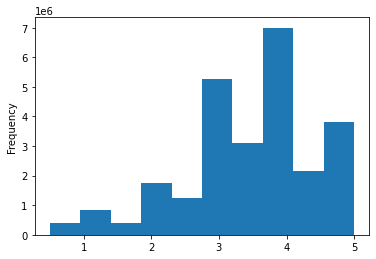

In [21]:
# Examine the rating data for outliers and dirty data using the .describe() method, following by reporting to a histogram

# Format our description output to 2 decimals
pd.options.display.float_format = '{:20,.2f}'.format
# Plot our Series into a histogram
ratings['rating'].plot(kind='hist')
# Print descriptive statistics
ratings['rating'].describe()